##  Four State Model
-------------

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
from scipy.integrate import odeint
sns.set()
%matplotlib inline

Following is the two state simultaneous model. States E1 to R4 represents the exchenger with 
- (1) calcium bound on the internal membrane side (E1)
- (2) calcium bound on the extrnal membrane (E2)
- (3) no calcium bound in hte external side (E3)
- (4) no calcium bound in the internal side (E4)

For the consecutive model,
 - Only those fraction of the states E3 and E4 will undergo translocation which have bound three sodium ions
 - Only those fractions of the states E1 and E2 will bind calcium which have no bound sodium ions

<img src = "img/4.png" height=300px width=300px> <img>

#### Transition Matrix

|states|E1|E2|E3|E4
|--|--|--|--|--|
|E1|1-(k1+k8) |k1 |0 |k8|
|E2|k2 |1-(k2+k3) |k3|0|
|E3|0 |k4|1-(k4+k5) |k5|
|E4|k7 |0 |k6 |1-(k7+k6)|


#### Differential Equations

$\frac{dE_{1}}{dt} = k_{2}E_{2} + k_{7}E_{4} - (k_{1}+k_{8})E_{1}$

$\frac{dE_{2}}{dt} = k_{4}E_{3} + k_{1}E_{1} - (k_{2}+k_{3})E_{2}$

$\frac{dE_{3}}{dt} = k_{3}E_{2} + k_{6}E_{4} - (k_{4}+k_{5})E_{3}$

$\frac{dE_{4}}{dt} = k_{8}E_{1} + k_{5}E_{3} - (k_{7}+k_{6})E_{4}$

Using, $ E_4 = 1 - E_1 - E_2 - E_3 $

#### Numerical Method (Dif. Eqn)

$\frac{dE_{1}}{dt} = - (k_{1}+k_{8} + k_{7})E_{1} + (k_{2}-k_{7})E_{2}- k_{7}E_{3} + k_{7}$

$\frac{dE_{2}}{dt} =  k_{1}E_{1} - (k_{2}+k_{3})E_{2}+ k_{4}E_{3}$

$\frac{dE_{3}}{dt} =  - k_{6}E_{1} + (k_{3}- k_{6})E_{2} - (k_{4}+k_{5} + k_{6})E_{3} + k_{6}$

#### Matrix Equation

$$\begin{pmatrix}
-(k_{1} + k_{8} + k_{7}) & (k_{2}-k_{7}) & -k_{7}\\
k_{1} & - (k_{2}+k_{3}) & k_{4} \\
- k_{6} & (k_{3}- k_{6}) & - (k_{4}+k_{5} + k_{6})\\
\end{pmatrix} \begin{pmatrix}
E_{1}\\
E_{2}\\
E_{3}\\
\end{pmatrix} = \begin{pmatrix}
-k_{7}\\
0\\
-k_{6}\\
\end{pmatrix}$$

-----------

### Na dependent inactivation

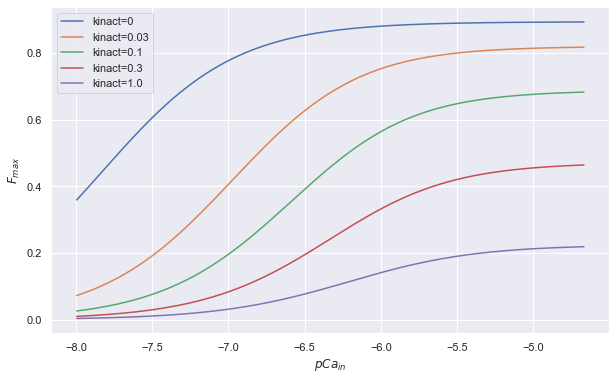

In [12]:
ni = 40
plt.figure(figsize = [10,6])
for kinact in [0, 0.03,0.1,0.3,1.0]:
    cinow = []
    ixnow = []
    for i in range(1,1001):
        
        logci = -(8-(i/300))
        ci = (10**(logci))*1000000
        f3n = (ni**2.5)/((ni**2.5)+(17**2.5))
        kcon1 = 0.1
        kcoff1 = 0.05
        kcon2 = 20
        kcoff2 = 0.3
    
    
        k2 = ci*kcon1
        k1 = kcoff1
        k5 = ci*kcon2
        k6 = kcoff2
        k8 = 0.3
        k7 = f3n*kinact
        k3 = 0.1
        k4 = f3n*kinact*25
        A = np.array([[-(k1+k8+k7),(k2-k7), -k7],[k1,-(k2+k3),k4],[-k6,(k3-k6),-(k4+k5+k6)]])
        b = np.array([-k7,0,-k6])
        x = np.linalg.solve(A,b)
    
        incx = (1-sum(x))*f3n
        
        cinow.append(logci)
        ixnow.append(incx)
        
    plt.plot(cinow,ixnow,label= "kinact="+str(kinact))
    
plt.xlabel("$pCa_{in}$")
plt.ylabel("$F_{max}$")
plt.legend()
#plt.savefig("plot/inact.png")
#plt.savefig("plot/inact.pdf")
plt.show()